In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
#from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LassoCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import ensemble, preprocessing, metrics
# data source: http://webuser.unicas.it/fontanella/avila.html

In [4]:
columns = ['F{}'.format(i + 1) for i in range(10)]
cols = columns + ['class']
print(cols)
train_data = pd.read_csv('train.txt', sep=',', header=None, names=cols)
test_data = pd.read_csv('test.txt', sep=',', header=None, names=cols)
train_X = train_data.drop("class", 1)
train_y = train_data['class']
test_X = test_data.drop("class", 1)
test_y = test_data['class']
train_X.head()

['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'class']


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652


In [120]:
test_X

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681
...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329


In [14]:
pca = PCA(n_components=4,whiten=True)
pca = pca.fit(train_X)
dataPCA = pca.transform(train_X)
dataPCA

array([[-0.00167443, -0.53062993,  0.51193361,  0.0869066 ],
       [ 0.22718639, -0.97629062, -0.75310862,  0.16286783],
       [ 0.0122697 , -0.05203046, -0.78944028, -0.41289192],
       ...,
       [ 0.01388946, -0.30135964, -0.9884815 , -0.50789867],
       [ 0.12871184, -1.06429901,  0.48717788,  0.54994577],
       [-0.19353536,  0.22086132, -0.28444485, -0.7497933 ]])

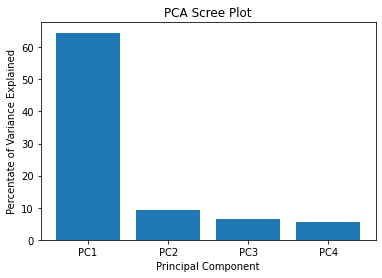

In [15]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble, preprocessing, metrics
forest = RandomForestClassifier(max_depth=2, random_state=0)
forest.fit(train_X,train_y)
forest_fit = forest.fit(data, train_data['class'])
test_y_predicted = forest.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.5030181086519114


In [33]:
# PCA version
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble, preprocessing, metrics
forest = RandomForestClassifier(max_depth=2, random_state=0)
forest.fit(dataPCA,train_y)
forest_fit = forest.fit(data, train_data['class'])
test_y_predicted = forest.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.5030181086519114


In [134]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_X, train_y)
test_y_predicted = neigh.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.7578806170355467


In [36]:
len(train_y)

10430

In [163]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier().fit(train_X, train_y)
test_y_predicted = clf.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.4781067356520073


In [165]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,multi_class = 'multinomial').fit(train_X, train_y)
test_y_predicted = clf.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.5607933314170739


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [166]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(train_X, train_y)
test_y_predicted = clf.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.8049247868161349


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [168]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB().fit(train_X, train_y)
test_y_predicted = clf.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.5041678643288301


In [170]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(train_X, train_y)
cls.score(test_X, test_y)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.5041678643288301


In [124]:
# PCA
from sklearn.neighbors import KNeighborsClassifier

pca = PCA(n_components=1,whiten=True)
pca = pca.fit(train_X)
dataPCA = pca.transform(train_X)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(dataPCA, train_y)

pca = PCA(n_components=1,whiten=True)
pca = pca.fit(test_X)
test_X_PCA = pca.transform(test_X)
test_y_predicted = neigh.predict(test_X_PCA)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.32106927277953434


In [24]:
from sklearn.svm import SVC
clf = svm.SVC()
clf.fit(train_X, train_y)
test_y_predicted = clf.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.6745233304589442


In [38]:
#PCA
from sklearn.svm import SVC
clf = svm.SVC()
clf.fit(dataPCA, train_y)

pca = PCA(n_components=4,whiten=True)
pca = pca.fit(test_X)
test_X_pca = pca.transform(test_X)
test_y_predicted = clf.predict(test_X_pca)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.3988694069176967


In [7]:

from xgboost import XGBClassifier
clf = XGBClassifier().fit(train_X, train_y)
test_y_predicted = clf.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.998275366484622


In [159]:
import pandas as pd

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


clf = ExtraTreesClassifier()
clf = clf.fit(train_X, train_y)
print(clf.feature_importances_)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(train_X)
X_important_test = model.transform(test_X)

print(X_new.shape)
from sklearn import tree
tree = RandomForestClassifier(max_depth=2, random_state=0)
tree = tree.fit(X_new, train_y)
test_y_predicted = tree.predict(X_important_test)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

[0.18572127 0.13682749 0.13371931 0.13074123 0.14342171 0.04737169
 0.04595963 0.04013857 0.09460022 0.04149887]
(10430, 5)
0.49851489891731343


In [14]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


clf = ExtraTreesClassifier()
clf = clf.fit(train_X, train_y)
print(clf.feature_importances_)
importances = clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(train_X)
X_important_test = model.transform(test_X)

print(X_new.shape)
from sklearn import tree
tree_ = tree.DecisionTreeClassifier().fit(X_new, train_y)
test_y_predicted = tree_.predict(X_important_test)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, test_y_predicted)

[0.18343299 0.13500215 0.1365464  0.13114955 0.14454161 0.04621982
 0.04366726 0.03966824 0.09780448 0.04196751]
(10430, 5)
0.9992334962153876


array([[4282,    2,    2,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    5,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,  103,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,  353,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0, 1095,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0, 1962,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,  447,    0,    0,    0,    0,
           0],
       [   0,    0,    3,    0,    0,    0,    0,  517,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  832,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   45,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  522,
           0],
       [   0,    0,  

In [35]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(train_X, train_y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(train_X)
X_important_test = model.transform(test_X)
print(X_new.shape)
from sklearn import tree
tree_ = tree.DecisionTreeClassifier().fit(X_new, train_y)
test_y_predicted = tree_.predict(X_important_test)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, test_y_predicted)

(10430, 10)
0.9679026540193543


array([[4196,    0,    3,    1,   19,   29,    2,   24,    5,    3,    3,
           1],
       [   0,    5,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   3,    0,  100,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,  340,   13,    0,    0,    0,    0,    0,    0,
           0],
       [  16,    0,    0,   14, 1029,    3,    2,    8,    1,    0,   19,
           3],
       [  33,    0,    2,    2,    3, 1909,    8,    3,    2,    0,    0,
           0],
       [   3,    0,    0,    0,    4,   11,  429,    0,    0,    0,    0,
           0],
       [  10,    0,    3,    0,    2,    0,    2,  501,    2,    0,    0,
           0],
       [  12,    0,    0,    0,    1,    0,    0,    0,  817,    0,    2,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   42,    3,
           0],
       [   5,    0,    0,    1,   18,    0,    0,    1,    1,    3,  485,
           8],
       [   0,    0,  

In [37]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(train_X, train_y)
#model = SelectFromModel(lsvc, prefit=True)
#X_new = model.transform(train_X)
#X_important_test = model.transform(test_X)
X_new = SelectKBest(chi2, k=2).fit_transform(train_X, train_y)
test_y_predicted = SelectKBest(chi2, k=2).fit_transform(test_X, test_y)
print(X_new.shape)
from sklearn import tree
tree_ = tree.DecisionTreeClassifier().fit(X_new, train_y)
test_y_predicted = tree_.predict(X_important_test)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, test_y_predicted)

ValueError: Input X must be non-negative.

In [28]:
train_X

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652
...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969


In [29]:
X_new

array([[ 2.660740e-01, -1.656200e-01,  3.209800e-01,  4.832990e-01,
         1.723400e-01],
       [ 1.302920e-01,  8.707360e-01, -3.210528e+00,  6.249300e-02,
         2.617180e-01],
       [-1.165850e-01,  6.991500e-02,  6.847600e-02, -7.831470e-01,
         2.617180e-01],
       ...,
       [ 2.290430e-01, -7.450000e-04,  1.716110e-01, -2.793000e-03,
         2.617180e-01],
       [-3.017430e-01,  3.525580e-01,  2.889730e-01,  1.638181e+00,
         2.617180e-01],
       [-1.042410e-01, -1.037102e+00,  3.885520e-01, -1.099311e+00,
         1.723400e-01]])

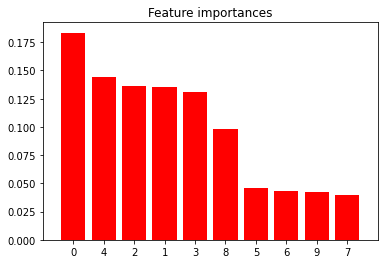

In [18]:
#std = np.std([tree.feature_importances_ for tree in tree.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(train_X.shape[1]), indices)
plt.xlim([-1, train_X.shape[1]])
plt.show()

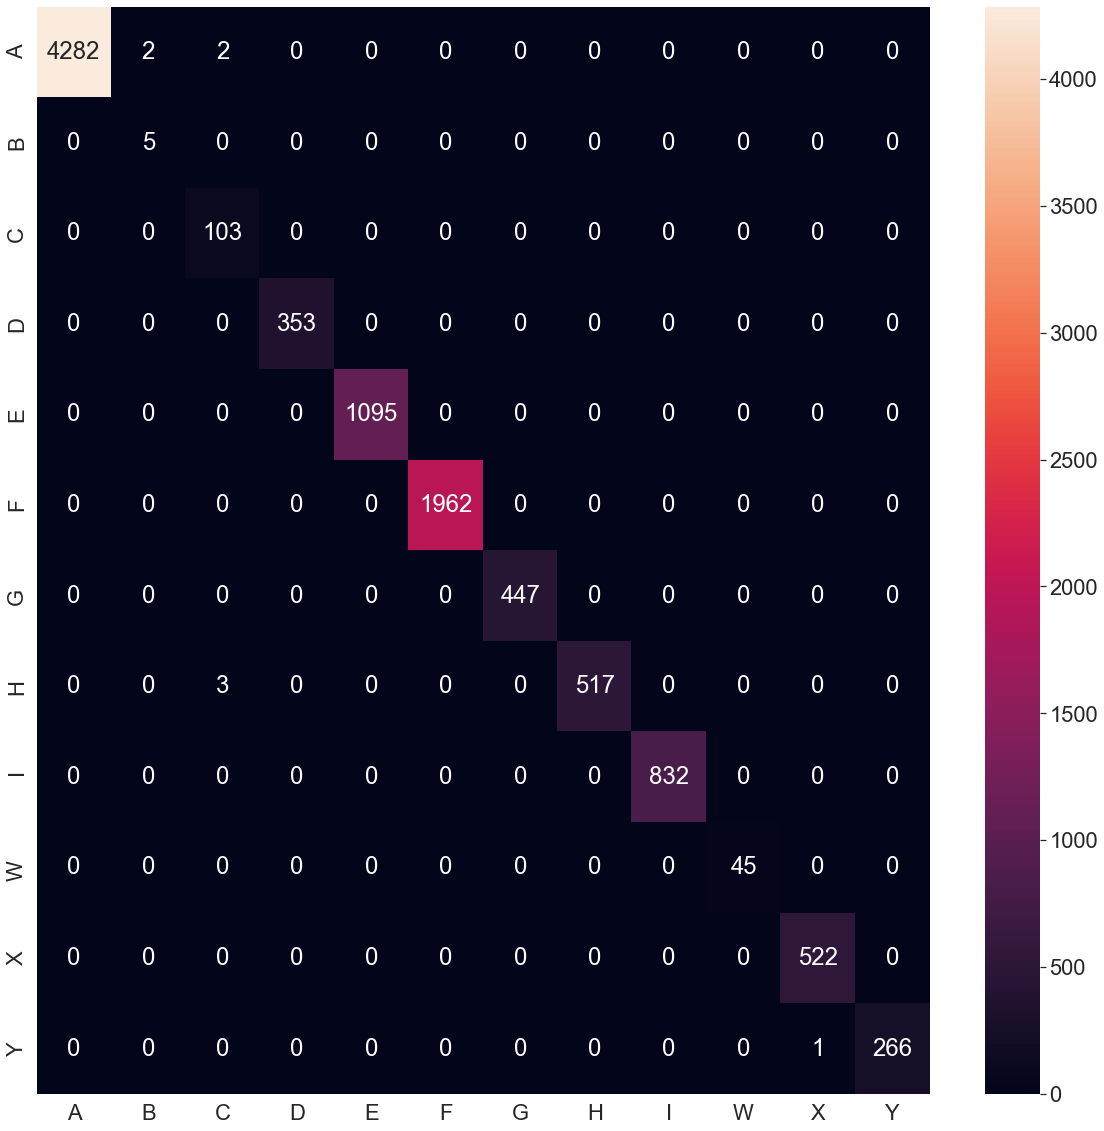

In [193]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_matrix(test_y, test_y_predicted), index = [i for i in "ABCDEFGHIWXY"],
                  columns = [i for i in "ABCDEFGHIWXY"])
plt.figure(figsize = (20,20))
sn.set(font_scale=2.0)
sn.heatmap(df_cm, annot=True, fmt='g')


In [122]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree = tree.fit(train_X, train_y)
test_y_predicted = tree.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.9716393599693398


In [172]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0).fit(train_X, train_y)
test_y_predicted = clf.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.9504646929194213


In [176]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=1000, tol=1e-3).fit(train_X, train_y)
test_y_predicted = clf.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.46047714860592126


In [179]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(train_X, train_y)
test_y_predicted = clf.predict(test_X)
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.5158570470441698


C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [61]:
presidents = ["Washington", "Adams", "Jefferson", "Madison", "Monroe", "Adams", "Jackson"]
for num, name in enumerate(presidents, start=1):
    print("President {}: {}".format(num, name))


President 1: Washington
President 2: Adams
President 3: Jefferson
President 4: Madison
President 5: Monroe
President 6: Adams
President 7: Jackson


In [112]:
train_y
col_names = ['A', 'B', 'C', 'D', 'E','F', 'G', 'H', 'I', 'W', 'X', 'Y']

df = pd.DataFrame(0,index=range(len(train_y)),columns=range(len(col_names)))
print(df)
for i, name_i in enumerate(train_y, start=0):
    for y, name_y in enumerate(range(len(col_names)), start=0):
        if name_i==str(col_names[name_y]):
            df.at[i,name_y] = 1
            
#df.at[1,1] = 1

for i in range(len(col_names)):
    print(df.at[10428,i])
df
#(df.iloc[1])
#type(train_y)

       0  1  2  3  4  5  6  7  8  9  10  11
0      0  0  0  0  0  0  0  0  0  0   0   0
1      0  0  0  0  0  0  0  0  0  0   0   0
2      0  0  0  0  0  0  0  0  0  0   0   0
3      0  0  0  0  0  0  0  0  0  0   0   0
4      0  0  0  0  0  0  0  0  0  0   0   0
...   .. .. .. .. .. .. .. .. .. ..  ..  ..
10425  0  0  0  0  0  0  0  0  0  0   0   0
10426  0  0  0  0  0  0  0  0  0  0   0   0
10427  0  0  0  0  0  0  0  0  0  0   0   0
10428  0  0  0  0  0  0  0  0  0  0   0   0
10429  0  0  0  0  0  0  0  0  0  0   0   0

[10430 rows x 12 columns]
0
0
0
0
1
0
0
0
0
0
0
0


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10425,0,0,0,0,0,1,0,0,0,0,0,0
10426,0,0,0,0,0,1,0,0,0,0,0,0
10427,1,0,0,0,0,0,0,0,0,0,0,0
10428,0,0,0,0,1,0,0,0,0,0,0,0


In [162]:
from keras.models import Sequential  
from keras.layers import Dense, LeakyReLU
from keras.wrappers.scikit_learn import KerasClassifier  
from sklearn.model_selection import StratifiedKFold  
from sklearn.model_selection import cross_val_score  
import numpy  
import pandas  
# Function to create model, required for KerasClassifier  
def create_model():  
    # create model  
    model = Sequential()  
    model.add(Dense(20, input_dim=10, activation='relu'))  
    model.add(Dense(20, activation='relu'))
    model.add(Dense(12, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
    model.summary()
    return model  
  
# fix random seed for reproducibility  
seed = 7  
numpy.random.seed(seed)  
  
# load pima indians dataset  
#dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")  
  
# split into input (X) and output (Y) variables  
X = train_X
Y = df 
  
# create model  
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10)  
  
# evaluate using 10-fold cross validation  
#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)  
#results = cross_val_score(model, X, Y, cv=kfold)  
results = cross_val_score(model, X, Y)  
print(results.mean())  

Model: "sequential_157"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_422 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_423 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_424 (Dense)            (None, 12)                252       
Total params: 892
Trainable params: 892
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
8344/8344 [==============================] - 3s 380us/step - loss: 0.2051 - accuracy: 0.9256
Epoch 2/10
8344/8344 [==============================] - 3s 348us/step - loss: 0.1611 - accuracy: 0.9367
Epoch 3/10
8344/8344 [==============================] - 3s 345us/step - loss: 0.1492 - accuracy: 0.9402
Epoch 4/10
8344/8344 [==============================] - 3s 343us/step - 